In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

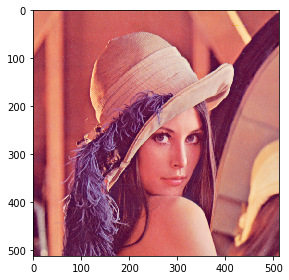

In [3]:
image = io.imread('Image_encoded_lena.tiff')
io.imshow(image)

In [4]:
rows, cols, dims = image.shape

In [5]:
total_bits = rows*cols*dims
one_channel_bits = rows*cols
one_channel_bits, total_bits

(262144, 786432)

In [6]:
def from_bits(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        byte = bits[b*8:(b+1)*8]
        s = ''
        for i in byte:
            s += str(i)
        chars.append(int(s, 2))
    return chars

In [7]:
message_len = 150784

In [8]:
decode = []
for ch in range(3):
    i = 0
    j = 0
    d = []
    for k in range(message_len):
        bit = image[i, j, ch] & 1
        d.append(bit)
        i += 1
        if i == cols:
            i = 0
            j += 1
        if j == rows:
            break
    decode.append(d)

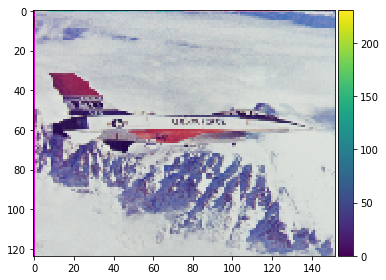

In [9]:
encrypted_red = np.array(from_bits(decode[0])).reshape(124, 152)
encrypted_gr = np.array(from_bits(decode[1])).reshape(124, 152)
encrypted_bl = np.array(from_bits(decode[2])).reshape(124, 152)
img = np.stack((encrypted_red, encrypted_gr, encrypted_bl), axis=2)
io.imshow(img)